In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [172]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [173]:
train.shape

(614, 13)

In [174]:
test.shape

(367, 12)

In [175]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [176]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [177]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [178]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [179]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# finding relations

In [182]:
num_train = train.select_dtypes(include=['number'])

In [183]:
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: >

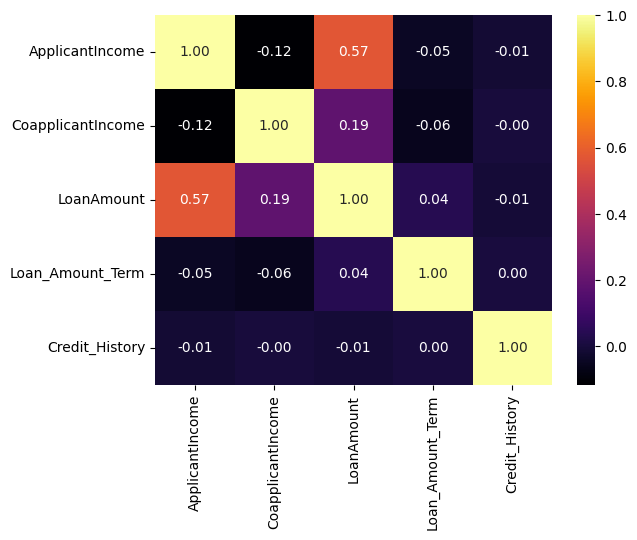

In [184]:
sns.heatmap(num_train.corr(),cmap='inferno', annot=True, fmt='.2f')

In [185]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
train['Loan_Status'] = lab.fit_transform(train['Loan_Status'])

In [186]:
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [187]:
num_train = train.select_dtypes(include=['number'])

<Axes: >

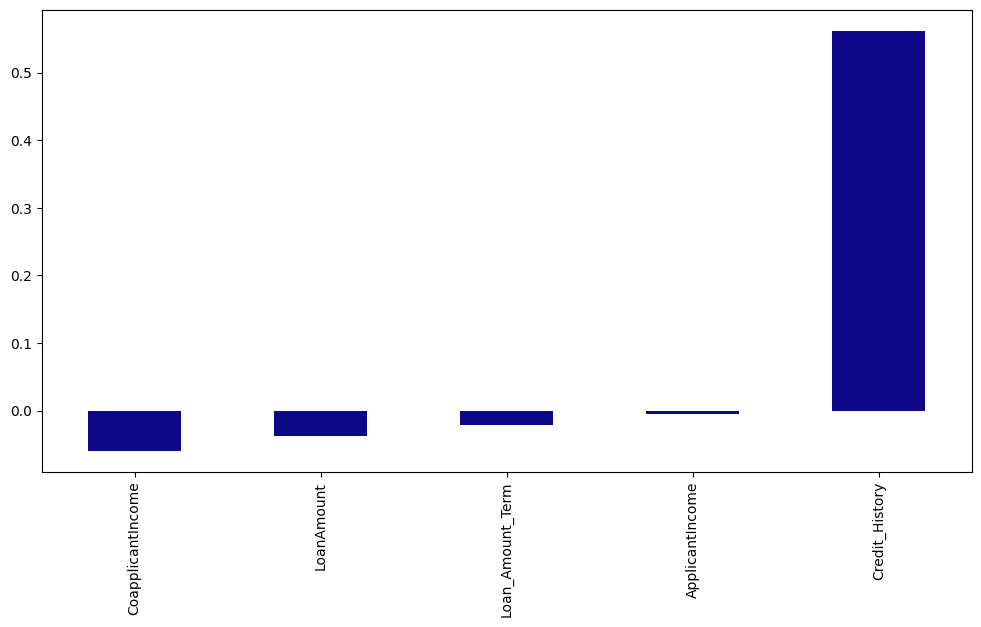

In [188]:
plt.figure(figsize = (12,6))
num_train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'plasma')


# EDA

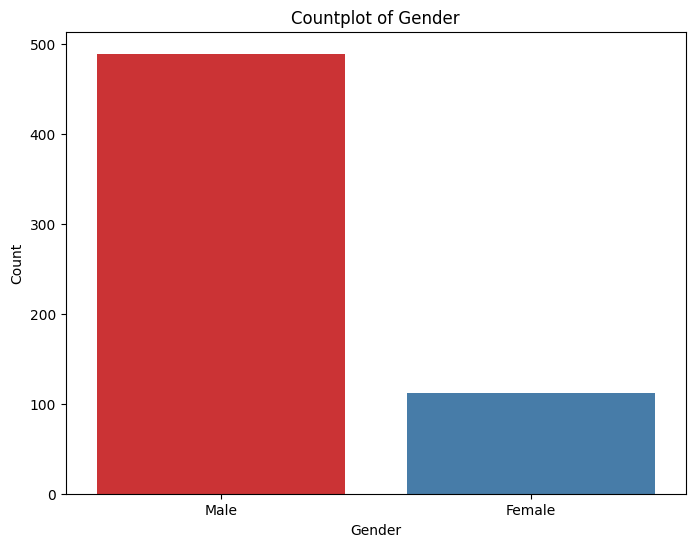

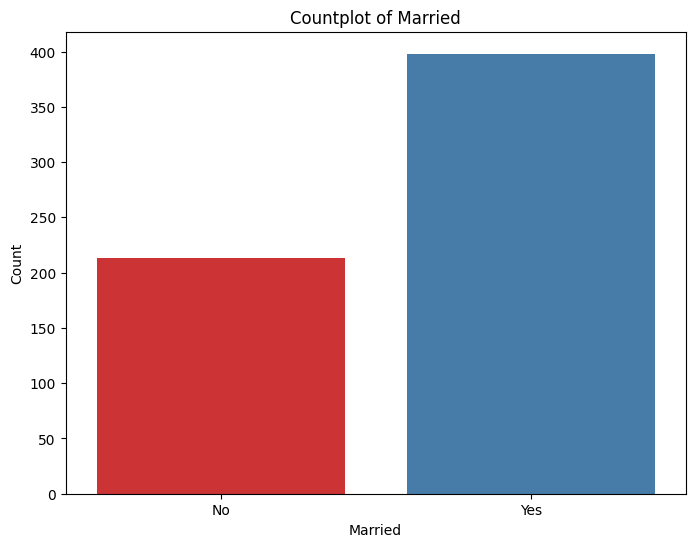

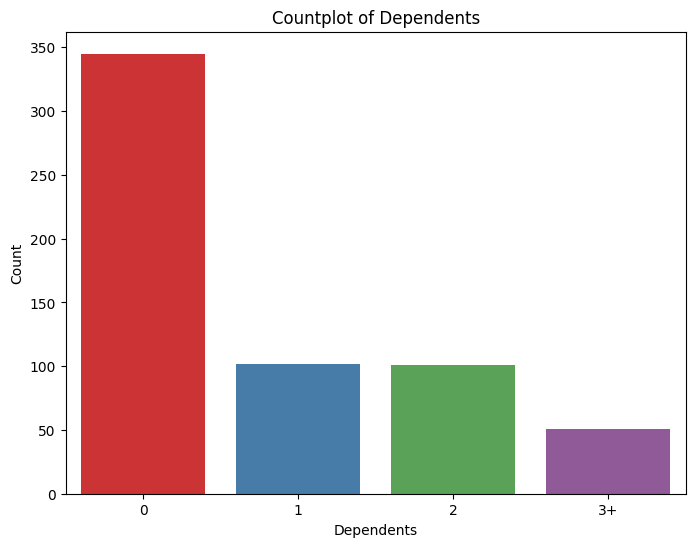

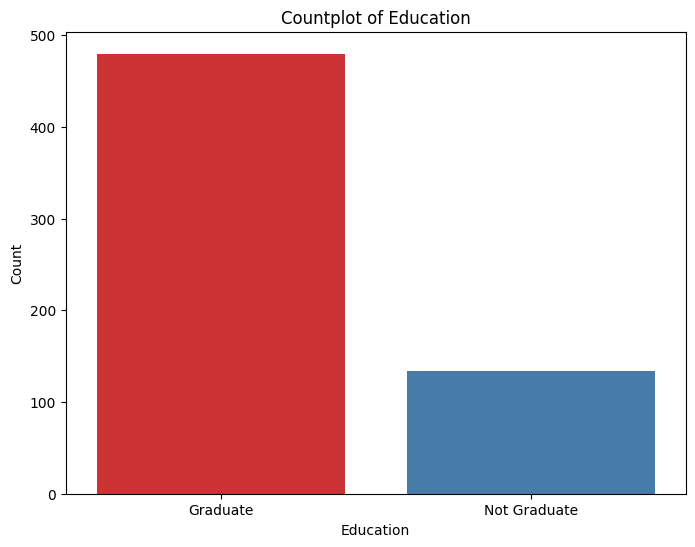

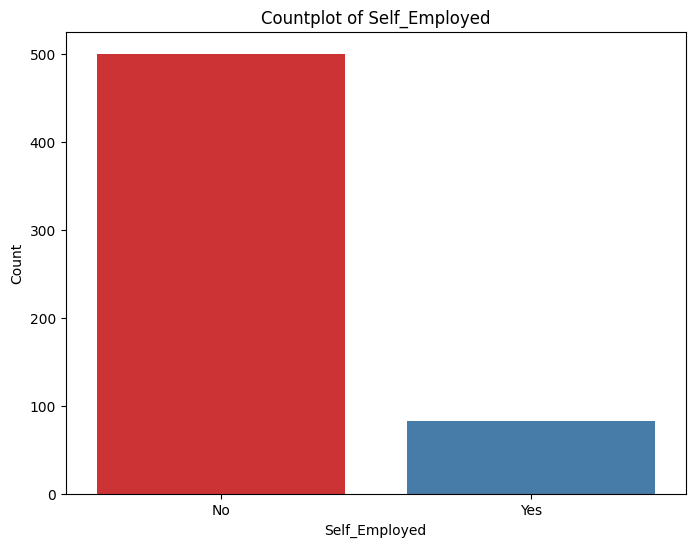

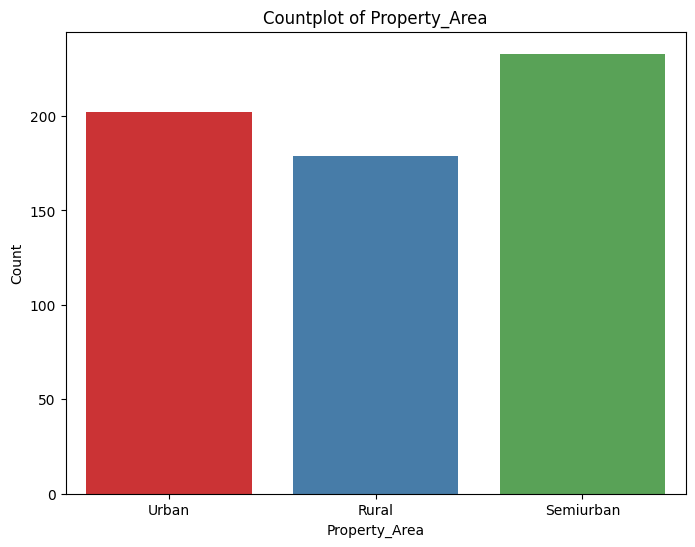

In [189]:
vals = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for val in vals:
  plt.figure(figsize=(8,6))
  sns.countplot(data=train,x=val,palette='Set1')
  plt.title(f'Countplot of {val}')
  plt.ylabel('Count')
  plt.xlabel(val)
  plt.show()


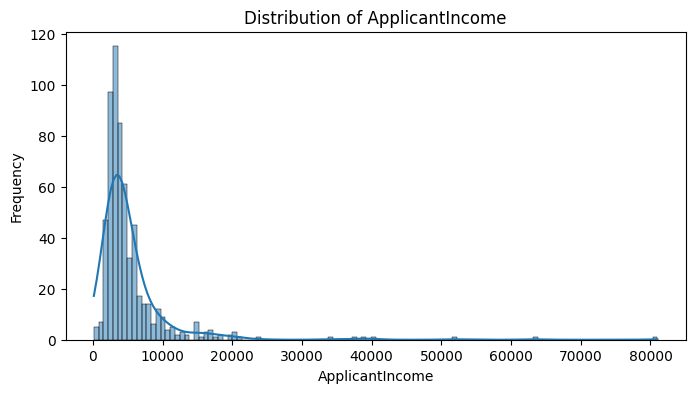

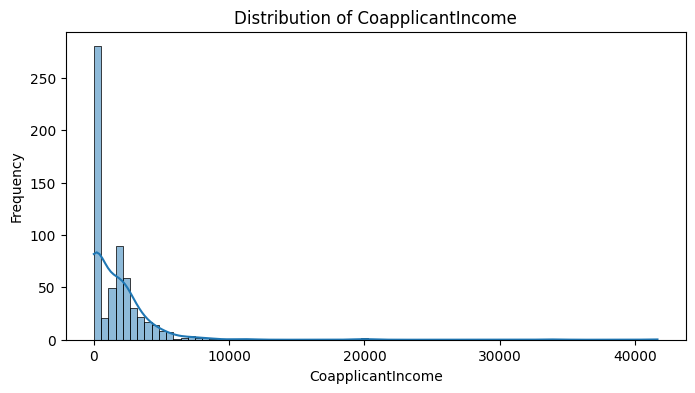

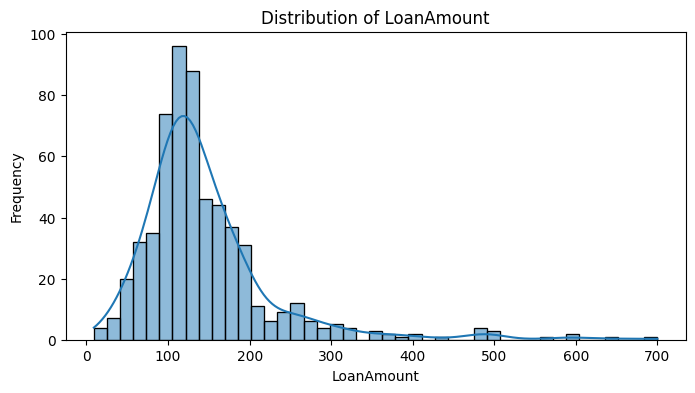

In [190]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


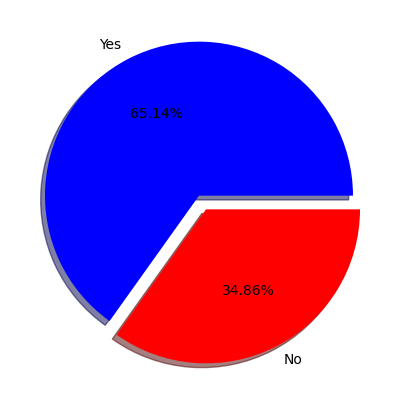

In [191]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['blue', 'red']
explode = [0.05, 0.05]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()


# LOOKING FOR NULL VALUES

In [192]:
train.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [193]:
test.isna().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [194]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')


# MISSING DATA HANDLING

In [195]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])


In [196]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [197]:
train.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [198]:
test.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [199]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')


In [200]:
train['Dependents'] = train['Dependents'].str.rstrip('+')

test['Dependents'] = test['Dependents'].str.rstrip('+')


In [201]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')


In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 62.5+ KB


In [203]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    int64  
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


# Imputing categorical variable


In [204]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})


In [205]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})


# creating dummy variables for property column

In [206]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)


In [207]:
property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)


# scaling

In [208]:
from sklearn.preprocessing import StandardScaler
stdscal = StandardScaler()


In [209]:
train['Loan_ID'] = stdscal.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = stdscal.transform(test['Loan_ID'].values.reshape(-1, 1))


In [210]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [211]:
for col in numerical_cols:
    train[col] = stdscal.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = stdscal.transform(test[col].values.reshape(-1, 1))


# SPLITTING DATA

In [212]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test


In [213]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


# BUILDING MODELS

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [215]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]


In [216]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))



LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.7081081081081081
RandomForestClassifier  0.8054054054054054
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838


hyperparameter tuning

In [217]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    }
}


In [218]:
scores = []
for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })



Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [219]:
final_result = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final_result.sort_values('score', ascending=False)


,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.5, max_iter=900, penalt..."
1,SVC,0.820487,"SVC(C=0.9, kernel='linear')"


In [220]:
final_result['estimator'].iloc[0]


LogisticRegression(C=0.5, max_iter=900, penalty='l1', solver='liblinear')

In [221]:
classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)


In [222]:
pred = classifier.predict(X_test)


# final decision

In [223]:
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
submission['Loan_ID'] = test_df['Loan_ID']


In [224]:
submission['Loan_Status'] = pred
submission.to_csv('/content/sample_submission_49d68Cx.csv', index=False)


In [225]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})


In [226]:
submission.to_csv('/content/sample_submission_49d68Cx.csv', index=False)
